# <center><font color = 'green'>PUBG Game Prediction</font></center>

<center><img src = 'https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExcmVqemF5ZG5xMmNvcWJ0Y2QxMHJlcW54YmM2cHIwdG10Nzk2aDhyaSZlcD12MV9naWZzX3NlYXJjaCZjdD1n/Li0OOdFFgAfECfuE9H/giphy.webp'/></center>

## Table of content

1. [Importing Libraries](#Importing_Libraries)
2. [Data Reading](#Data_Reading)
3. [Data Wrangling](#Data_Wrangling)
4. [Feature Engineering](#Feature_Engineering)
5. [ML Catboost-Model](#ML_Catboost_Model)

dataset link: [Pubg_game_prediction]()

## Importing Libraries<a class = 'anchor' id = 'Importing_Libraries'></a> 

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

plt.rcParams["figure.figsize"] = (16, 6)

## Data Reading<a class = 'anchor' id = 'Data_Reading'></a> 

In [2]:
df = pd.read_csv('PUBG_Game_Prediction_data.csv')

In [3]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

## Data Wrangling<a class = 'anchor' id = 'Data_Wrangling'></a>

- ### Remove the Data without Prediction value

In [5]:
df[df['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [6]:
df.drop(2744604, inplace = True)

- ## Undestanding the Distribution of Players in each match

In [7]:
df ['PlayersJoined'] = df.groupby('matchId')['matchId'].transform('count')

<Axes: xlabel='PlayersJoined', ylabel='count'>

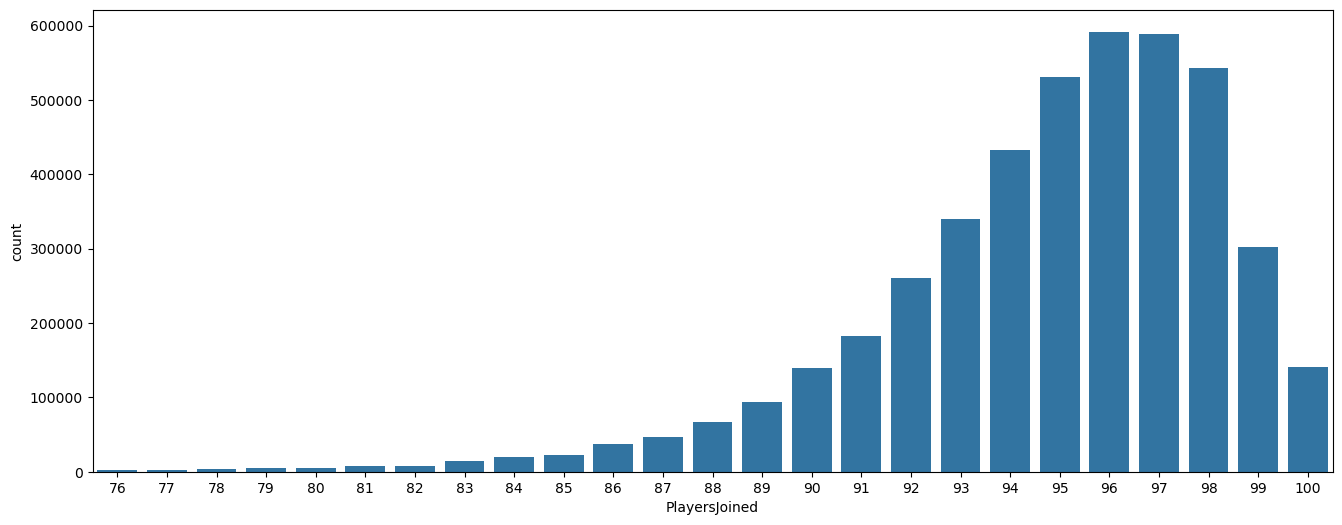

In [10]:
sns.countplot(df[df['PlayersJoined'] > 75], x = 'PlayersJoined')

## Analysing the data

- ### Kills without moving

<center><img src = 'https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExcnEycmM5cWZqcjViY3lkeHY1ajhkNGdldXc5NTJiYmh3N3JqcmdxdCZlcD12MV9naWZzX3NlYXJjaCZjdD1n/3oxHQfzBhpKtgdDWtW/200.webp'/></center>

In [16]:
df['TotalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']
df['KillsWithoutMoving'] = (df['kills'] > 0 )& (df['TotalDistance'] == 0)

In [17]:
df[df['KillsWithoutMoving'] == True].shape

(1535, 32)

In [18]:
df.drop(df[df['KillsWithoutMoving'] == True].index, inplace = True)

In [19]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayersJoined,TotalDistance,KillsWithoutMoving
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.00,0,0,244.80,1,1466,0.4444,96,244.8000,False
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,11.04,0,0,1434.00,5,0,0.6400,91,1445.0445,False
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.00,0,0,161.80,2,0,0.7755,98,161.8000,False
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.00,0,0,202.70,3,0,0.1667,91,202.7000,False
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.00,0,0,49.75,2,0,0.1875,97,49.7500,False


- ### Extraordinary Road Kills

<center><img src = 'https://media4.giphy.com/media/3o6fJ5yNwcCuRBcELK/200.webp?cid=790b7611rq2rc9qfjr5bcydxv5j8d4geuw952bbhw7rjrgqt&ep=v1_gifs_search&rid=200.webp&ct=g'/></center>

In [21]:
df[df['roadKills'] > 5].shape

(46, 32)

In [22]:
df.drop(df[df['roadKills'] > 5].index, inplace = True)

- ### So Many Kills. How??

<center><img src = 'https://media2.giphy.com/media/ZLW4hxLpx1CxmaTUM9/giphy.webp?cid=ecf05e47acecewoaobgnr4vggc7lvr89uq913lxj7zmubpzo&ep=v1_gifs_search&rid=giphy.webp&ct=g'></center>

In [23]:
df[df['kills'] > 20].shape

(417, 32)

In [26]:
df.drop(df[df['kills'] > 20].index, inplace = True)

Text(0, 0.5, 'Count of Players')

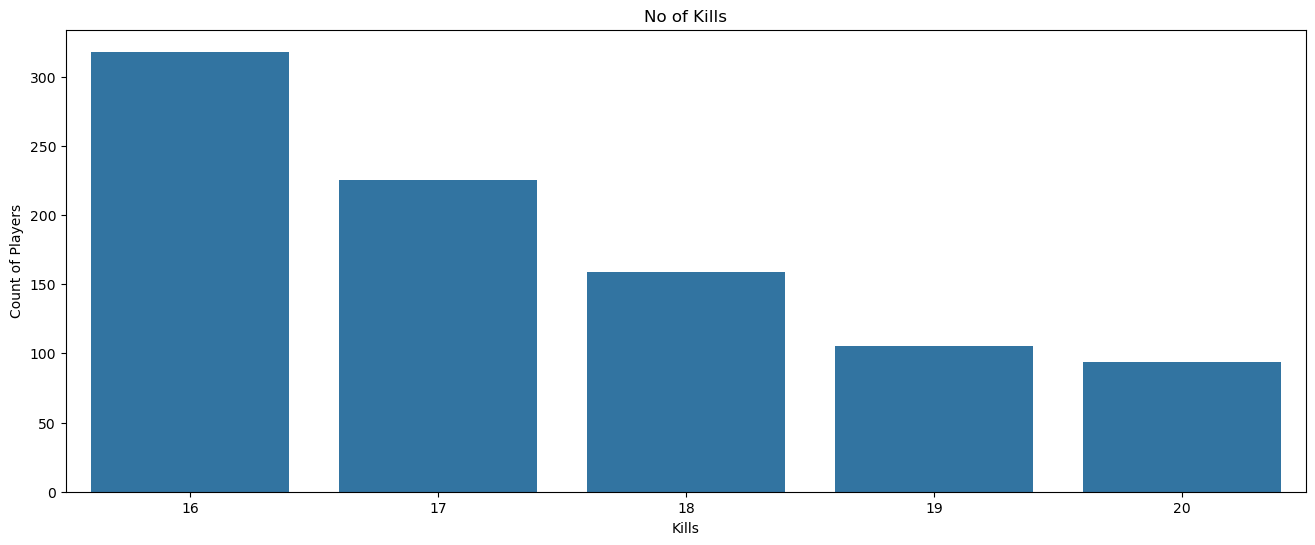

In [27]:
sns.countplot(df[df['kills'] > 15], x = 'kills' )
plt.title('No of Kills')
plt.xlabel('Kills')
plt.ylabel('Count of Players')

- ### Headshots

<center><img src = 'https://media4.giphy.com/media/l3mZrOajz5VCZf7Hy/200.webp?cid=790b7611clnlnjk9siwsmldhftx0vfyehreon97lgycwagrb&ep=v1_gifs_search&rid=200.webp&ct=g'/></center>

In [29]:
df['headshot_ratio'] = df['headshotKills']/df['kills']
df['headshot_ratio'].fillna(0, inplace = True)

Text(0, 0.5, 'Count of Players')

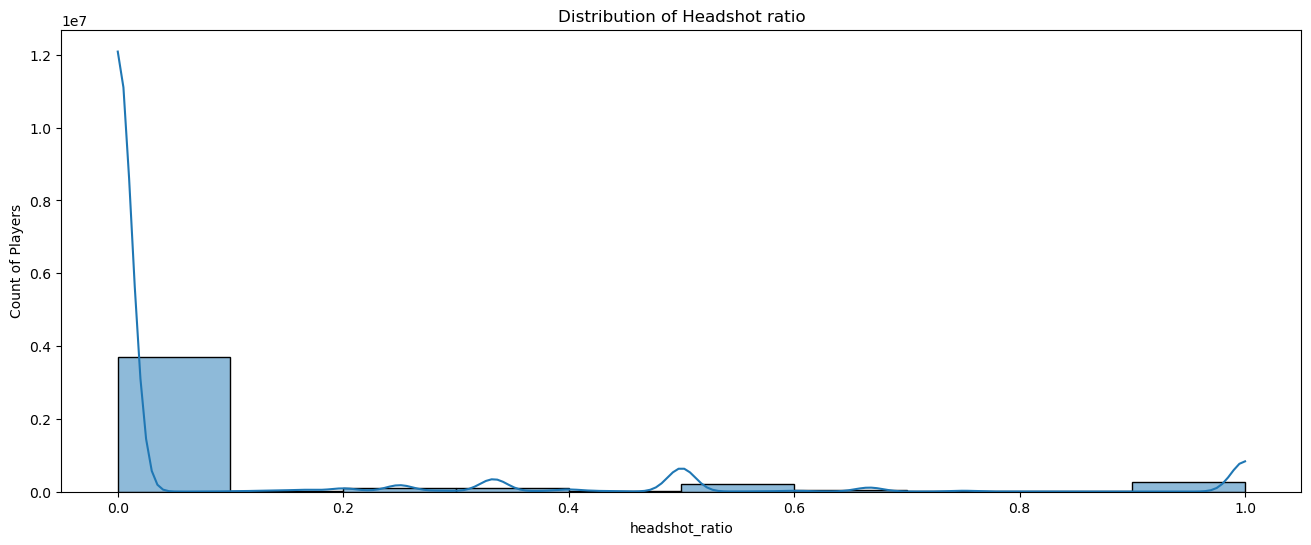

In [37]:
sns.histplot(df['headshot_ratio'], bins = 10, kde = True).set_title('Distribution of Headshot ratio')
plt.ylabel('Count of Players')


In [44]:
df.drop(df[(df['headshot_ratio'] == 1) & (df['kills'] > 5)].index, inplace = True)

- ### Longest Shot

<center><img src = 'https://media4.giphy.com/media/xT0xeNaiTQjRpZkpZ6/200.webp?cid=790b7611clnlnjk9siwsmldhftx0vfyehreon97lgycwagrb&ep=v1_gifs_search&rid=200.webp&ct=g'/></center>

In [46]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'PlayersJoined',
       'TotalDistance', 'KillsWithoutMoving', 'headshot_ratio'],
      dtype='object')

In [47]:
df[df['longestKill'] > 500].shape

(1736, 33)

In [48]:
df.drop(df[df['longestKill'] > 500].index, inplace = True)

- ### Weapon Change

Text(0, 0.5, 'Count of Players')

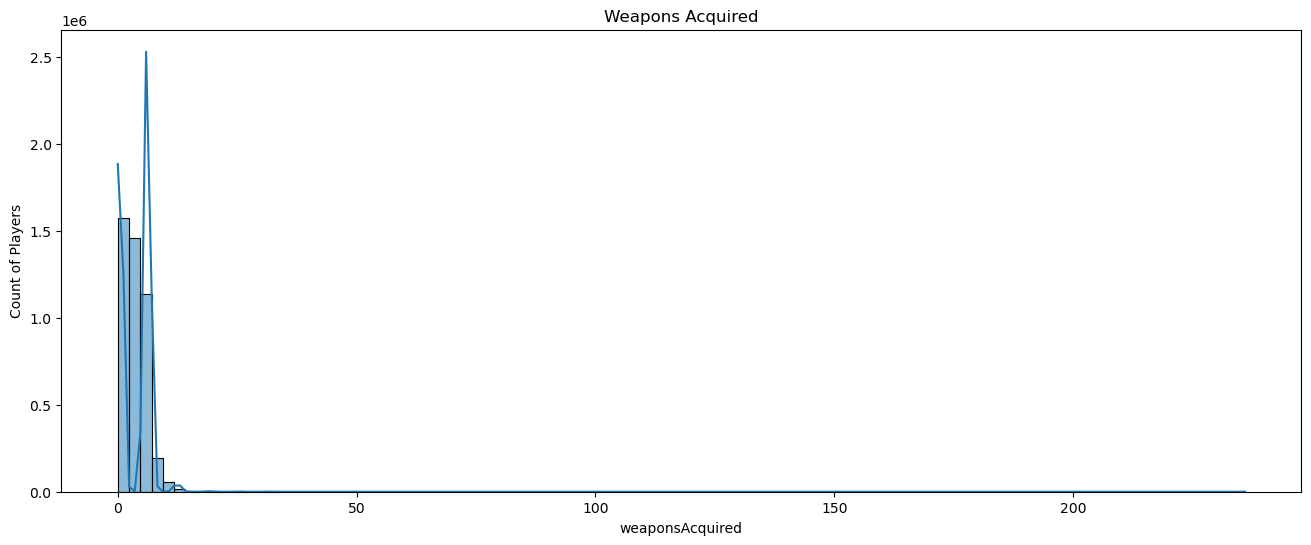

In [51]:
sns.histplot(df['weaponsAcquired'], bins = 100, kde = True).set_title('Weapons Acquired')
plt.ylabel('Count of Players')

In [52]:
df[df['weaponsAcquired'] > 15].shape

(5435, 33)

In [53]:
df.drop(df[df['weaponsAcquired'] > 15].index, inplace = True)

## EDA

In [54]:
df.shape

(4437609, 33)

In [55]:
df.isna().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts                0
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints            0
kills                 0
killStreaks           0
longestKill           0
matchDuration         0
matchType             0
maxPlace              0
numGroups             0
rankPoints            0
revives               0
rideDistance          0
roadKills             0
swimDistance          0
teamKills             0
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
winPlacePerc          0
PlayersJoined         0
TotalDistance         0
KillsWithoutMoving    0
headshot_ratio        0
dtype: int64

In [70]:
cols = df.select_dtypes(exclude = ['object']).columns

In [71]:
cols

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'PlayersJoined', 'TotalDistance', 'KillsWithoutMoving',
       'headshot_ratio'],
      dtype='object')

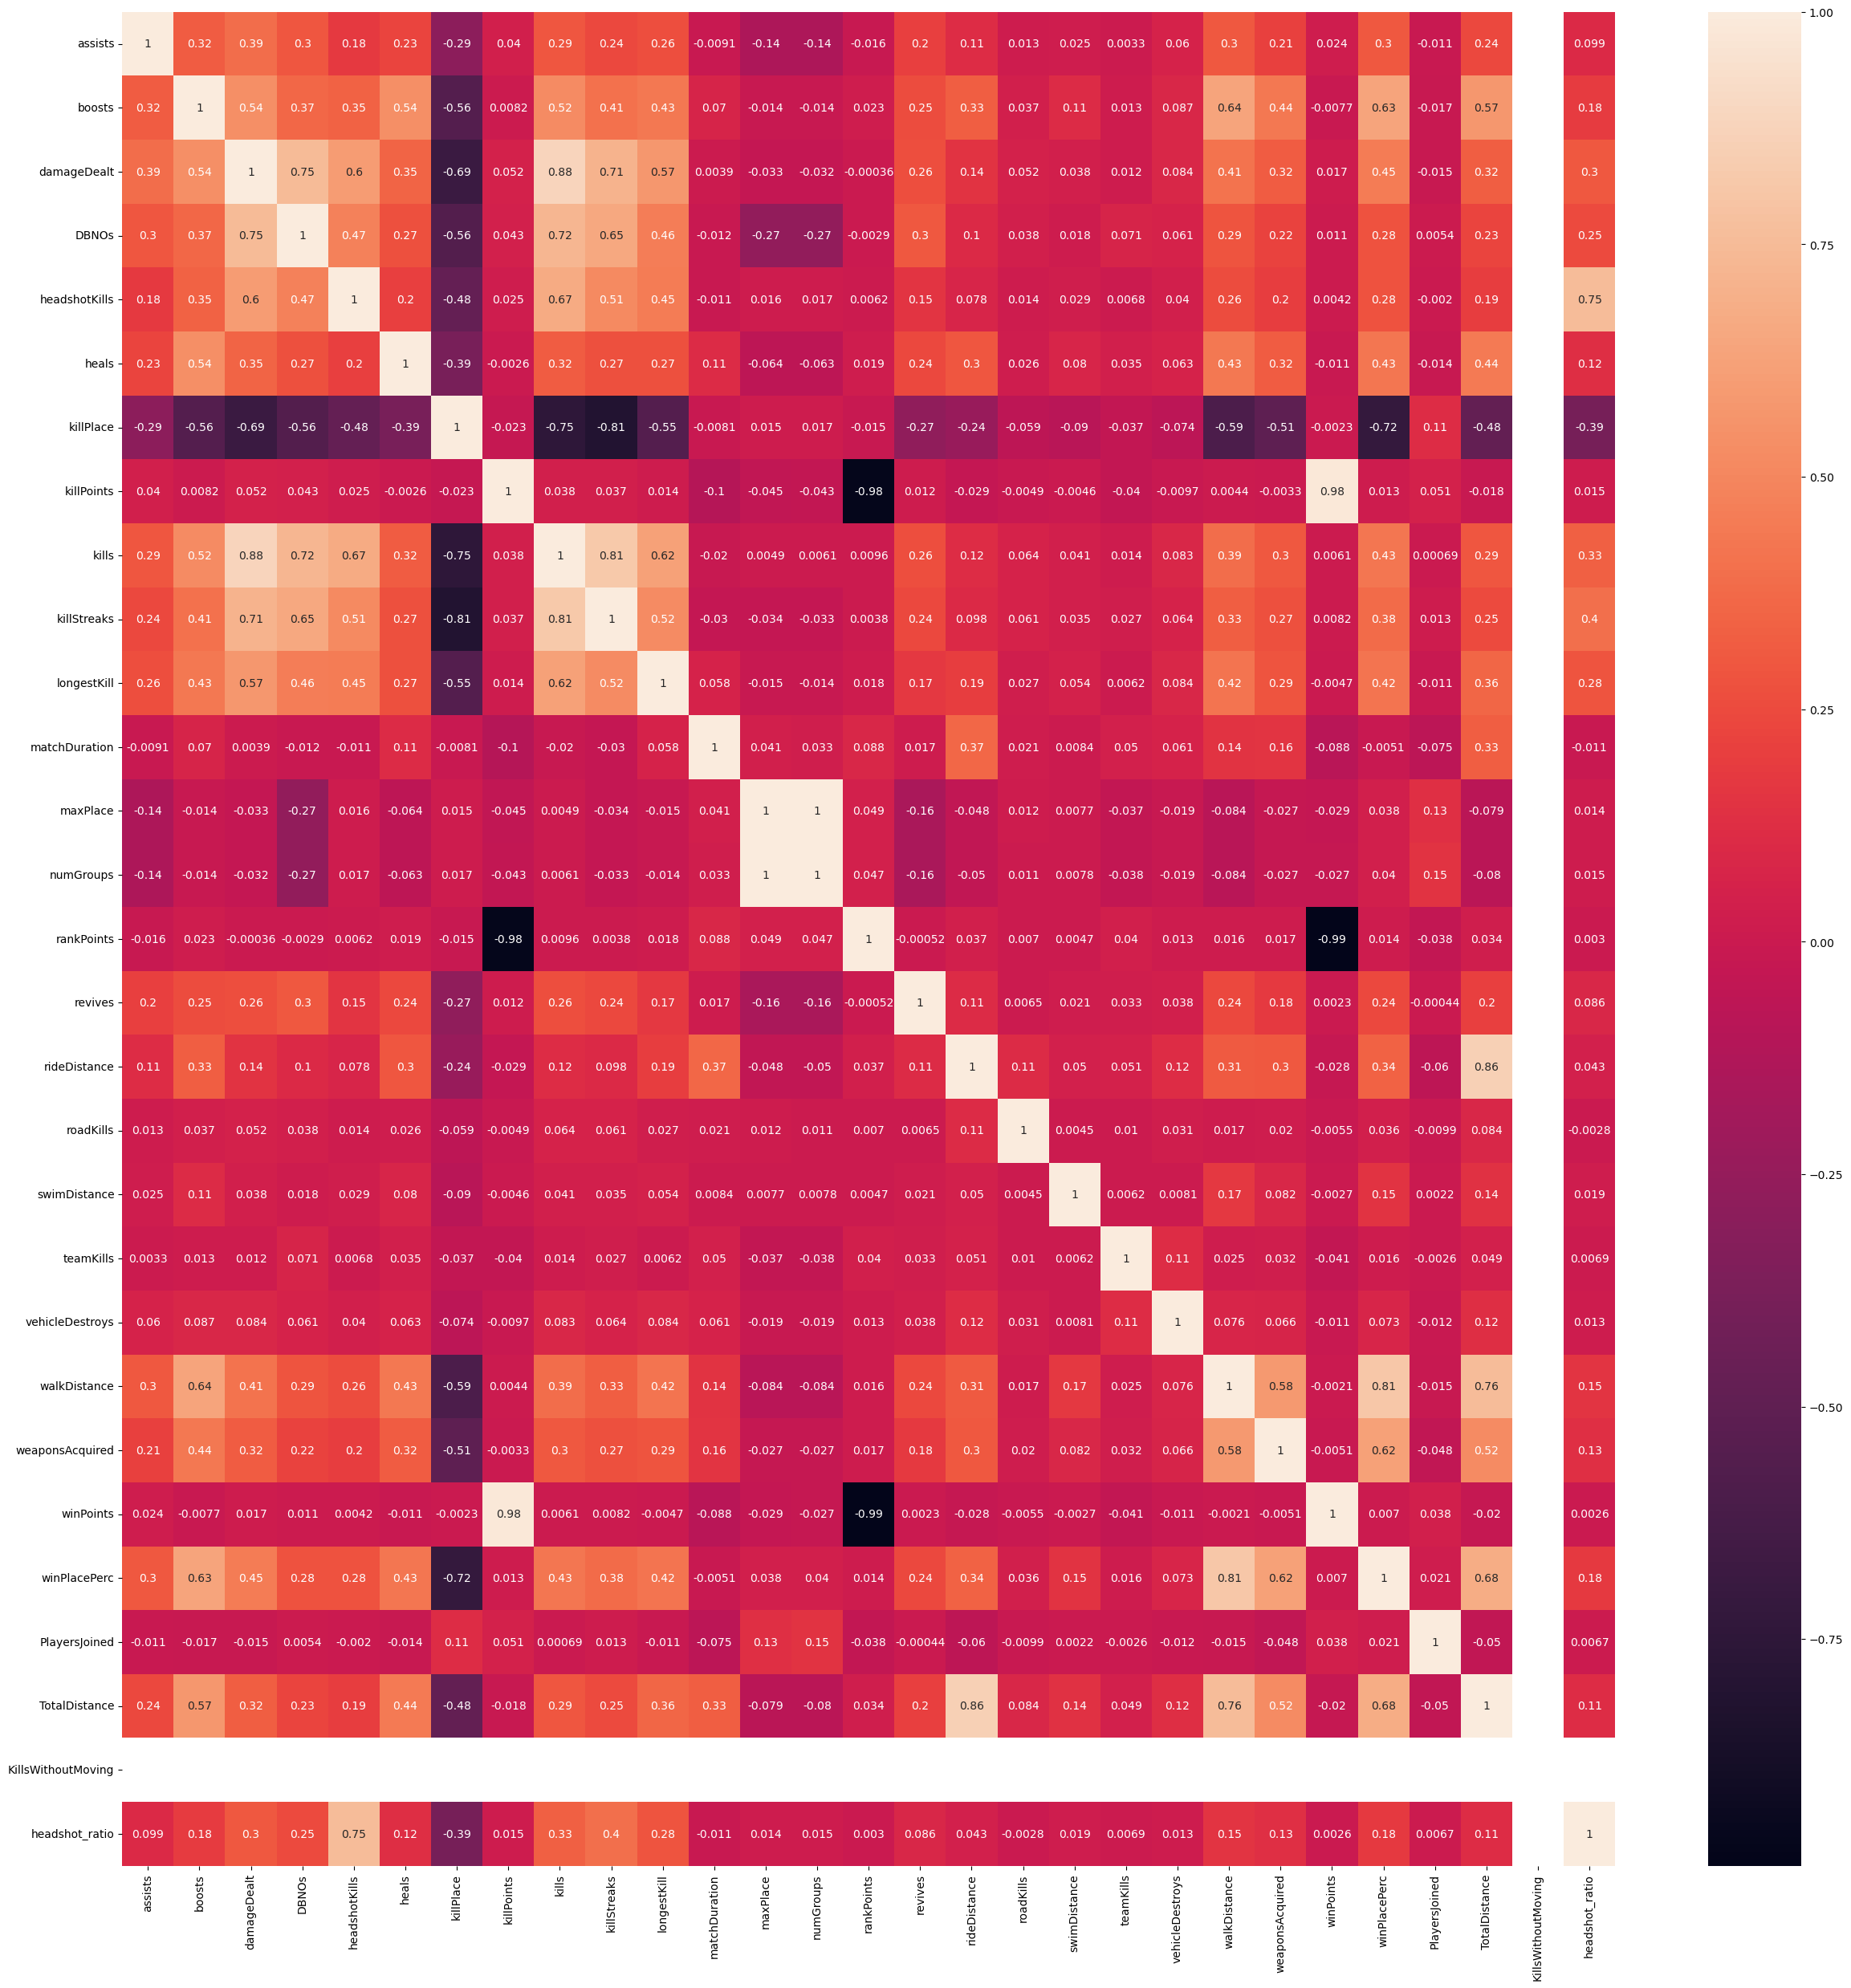

In [72]:
plt.figure(figsize=(30,30))
sns.heatmap(df[cols].corr(), annot = True)
plt.show()

## Feature Engineering <a class = 'anchor' id = 'Feature_Engineering'><a/>

In [78]:
normalizing_factor = (100 - df['PlayersJoined']/100) + 1

In [79]:
normalizing_factor

0          100.04
1          100.09
2          100.02
3          100.09
4          100.03
            ...  
4446961    100.06
4446962    100.07
4446963    100.02
4446964    100.06
4446965    100.02
Name: PlayersJoined, Length: 4437609, dtype: float64

In [75]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,PlayersJoined,TotalDistance,KillsWithoutMoving,headshot_ratio
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0,244.80,1,1466,0.4444,96,244.8000,False,0.0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0,1434.00,5,0,0.6400,91,1445.0445,False,0.0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0,161.80,2,0,0.7755,98,161.8000,False,0.0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0,202.70,3,0,0.1667,91,202.7000,False,0.0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0,49.75,2,0,0.1875,97,49.7500,False,0.0


In [81]:
df['killsNorm'] = df['kills'] * normalizing_factor
df['damageDealtNorm'] = df['damageDealt'] * normalizing_factor
df['maxPlaceNorm'] = df['maxPlace'] * normalizing_factor
df['matchDurationNorm'] = df['matchDuration'] * normalizing_factor

df['healsNBoosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

In [82]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'PlayersJoined',
       'TotalDistance', 'KillsWithoutMoving', 'headshot_ratio', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm', 'healsNBoosts',
       'assist'],
      dtype='object')

In [84]:
df.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'heals', 'matchDuration', 'revives',
                   'rideDistance', 'swimDistance', 'walkDistance', 'maxPlace', 'kills'], inplace = True)

In [90]:
data = df

In [91]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,PlayersJoined,TotalDistance,KillsWithoutMoving,headshot_ratio,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsNBoosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,96,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,91,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,98,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,91,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,97,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,0,0


data.head()

## ML Catboost Model <a class = 'anchor' id = 'ML_Catboost_Model'/>

In [92]:
x = data.drop('winPlacePerc', axis = 1)
y = data['winPlacePerc']

In [93]:
x = pd.get_dummies(x, columns = ['matchType', 'KillsWithoutMoving'], dtype=int)

In [94]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,KillsWithoutMoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,57,0,0,0.00,25,1484,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,47,0,0,0.00,47,1491,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,75,0,0,0.00,30,1408,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,45,0,1,58.53,95,1560,0,0,...,0,0,0,0,0,0,1,0,0,1


In [95]:
x.shape

(4437609, 39)

In [96]:
features = x.columns

- ### Scaling the Data

In [99]:
sc = StandardScaler()

In [100]:
sc.fit(x)
x = pd.DataFrame(sc.transform(x))

In [101]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,-0.582723,-0.384145,0.449543,1.172543,-0.765177,-0.459685,-0.732763,-1.212394,-0.049576,-0.14253,...,-0.03364,-0.005516,-0.013898,-0.008426,-0.054799,-0.206547,-0.370782,-0.405072,1.236289,0.0
1,-0.582723,-0.384145,0.340251,-0.804724,-0.765177,-0.459685,-0.775734,0.803563,-0.049576,-0.14253,...,-0.03364,-0.005516,-0.013898,-0.008426,-0.054799,-0.206547,-0.370782,-0.405072,1.236289,0.0
2,-0.582723,-0.384145,-0.024055,-0.804724,-0.765177,-0.459685,0.169631,0.813066,-0.049576,-0.14253,...,-0.03364,-0.005516,-0.013898,-0.008426,-0.054799,-0.206547,-0.370782,-0.405072,-0.808872,0.0
3,-0.582723,-0.384145,0.996002,-0.804724,-0.765177,-0.459685,-0.560878,0.700389,-0.049576,-0.14253,...,-0.03364,-0.005516,-0.013898,-0.008426,-0.054799,-0.206547,-0.370782,-0.405072,1.236289,0.0
4,-0.582723,-0.384145,-0.096916,-0.804724,0.647528,0.727175,2.232246,0.906736,-0.049576,-0.14253,...,-0.03364,-0.005516,-0.013898,-0.008426,-0.054799,-0.206547,2.697000,-0.405072,-0.808872,0.0


- ### Splitting the Data

In [102]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state = 0)
print(xtrain.shape, xtest.shape)
print(ytrain.shape, ytest.shape)

(3106326, 39) (1331283, 39)
(3106326,) (1331283,)


## Catboost Model

In [104]:
import catboost as cb

In [107]:
train_dataset = cb.Pool(xtrain, ytrain)
test_dataset = cb.Pool(xtest,ytest)

In [108]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [109]:
# GRID Search

grid = {'iterations': [100, 150], 
       'learning_rate': [0.03, 0.1], 
       'depth': [2, 4, 6, 8]}

model.grid_search(grid, train_dataset)

0:	learn: 0.5483880	test: 0.5479758	best: 0.5479758 (0)	total: 298ms	remaining: 29.5s
1:	learn: 0.5335324	test: 0.5331304	best: 0.5331304 (1)	total: 402ms	remaining: 19.7s
2:	learn: 0.5191675	test: 0.5187775	best: 0.5187775 (2)	total: 501ms	remaining: 16.2s
3:	learn: 0.5052407	test: 0.5048603	best: 0.5048603 (3)	total: 605ms	remaining: 14.5s
4:	learn: 0.4917697	test: 0.4913996	best: 0.4913996 (4)	total: 784ms	remaining: 14.9s
5:	learn: 0.4787498	test: 0.4783897	best: 0.4783897 (5)	total: 988ms	remaining: 15.5s
6:	learn: 0.4661665	test: 0.4658156	best: 0.4658156 (6)	total: 1.21s	remaining: 16s
7:	learn: 0.4540081	test: 0.4536670	best: 0.4536670 (7)	total: 1.42s	remaining: 16.3s
8:	learn: 0.4422129	test: 0.4418801	best: 0.4418801 (8)	total: 1.63s	remaining: 16.5s
9:	learn: 0.4307964	test: 0.4304719	best: 0.4304719 (9)	total: 1.84s	remaining: 16.5s
10:	learn: 0.4197929	test: 0.4194755	best: 0.4194755 (10)	total: 2.04s	remaining: 16.5s
11:	learn: 0.4091173	test: 0.4088083	best: 0.4088083 (

94:	learn: 0.1398631	test: 0.1399457	best: 0.1399457 (94)	total: 19.3s	remaining: 1.01s
95:	learn: 0.1394614	test: 0.1395462	best: 0.1395462 (95)	total: 19.5s	remaining: 813ms
96:	learn: 0.1390860	test: 0.1391737	best: 0.1391737 (96)	total: 19.7s	remaining: 609ms
97:	learn: 0.1386740	test: 0.1387613	best: 0.1387613 (97)	total: 19.9s	remaining: 406ms
98:	learn: 0.1383213	test: 0.1384111	best: 0.1384111 (98)	total: 20.1s	remaining: 203ms
99:	learn: 0.1379764	test: 0.1380686	best: 0.1380686 (99)	total: 20.3s	remaining: 0us

bestTest = 0.1380685973
bestIteration = 99

0:	loss: 0.1380686	best: 0.1380686 (0)	total: 22.7s	remaining: 5m 40s
0:	learn: 0.5127886	test: 0.5123924	best: 0.5123924 (0)	total: 237ms	remaining: 23.5s
1:	learn: 0.4672448	test: 0.4668809	best: 0.4668809 (1)	total: 452ms	remaining: 22.2s
2:	learn: 0.4267111	test: 0.4263838	best: 0.4263838 (2)	total: 665ms	remaining: 21.5s
3:	learn: 0.3905604	test: 0.3902570	best: 0.3902570 (3)	total: 875ms	remaining: 21s
4:	learn: 0.35850

88:	learn: 0.1172407	test: 0.1173617	best: 0.1173617 (88)	total: 17.7s	remaining: 2.19s
89:	learn: 0.1171423	test: 0.1172672	best: 0.1172672 (89)	total: 17.9s	remaining: 1.99s
90:	learn: 0.1170529	test: 0.1171791	best: 0.1171791 (90)	total: 18.1s	remaining: 1.79s
91:	learn: 0.1166123	test: 0.1167306	best: 0.1167306 (91)	total: 18.4s	remaining: 1.59s
92:	learn: 0.1165280	test: 0.1166478	best: 0.1166478 (92)	total: 18.6s	remaining: 1.4s
93:	learn: 0.1164285	test: 0.1165489	best: 0.1165489 (93)	total: 18.7s	remaining: 1.2s
94:	learn: 0.1163323	test: 0.1164510	best: 0.1164510 (94)	total: 18.9s	remaining: 997ms
95:	learn: 0.1161951	test: 0.1163148	best: 0.1163148 (95)	total: 19.1s	remaining: 797ms
96:	learn: 0.1161021	test: 0.1162216	best: 0.1162216 (96)	total: 19.4s	remaining: 598ms
97:	learn: 0.1160006	test: 0.1161167	best: 0.1161167 (97)	total: 19.5s	remaining: 399ms
98:	learn: 0.1159062	test: 0.1160238	best: 0.1160238 (98)	total: 19.7s	remaining: 199ms
99:	learn: 0.1158227	test: 0.11594

81:	learn: 0.1467280	test: 0.1467893	best: 0.1467893 (81)	total: 17.8s	remaining: 14.8s
82:	learn: 0.1460457	test: 0.1461093	best: 0.1461093 (82)	total: 18s	remaining: 14.5s
83:	learn: 0.1454475	test: 0.1455146	best: 0.1455146 (83)	total: 18.2s	remaining: 14.3s
84:	learn: 0.1448810	test: 0.1449499	best: 0.1449499 (84)	total: 18.5s	remaining: 14.1s
85:	learn: 0.1443136	test: 0.1443848	best: 0.1443848 (85)	total: 18.7s	remaining: 13.9s
86:	learn: 0.1437158	test: 0.1437868	best: 0.1437868 (86)	total: 18.9s	remaining: 13.7s
87:	learn: 0.1431973	test: 0.1432711	best: 0.1432711 (87)	total: 19.1s	remaining: 13.5s
88:	learn: 0.1426498	test: 0.1427234	best: 0.1427234 (88)	total: 19.4s	remaining: 13.3s
89:	learn: 0.1421736	test: 0.1422488	best: 0.1422488 (89)	total: 19.6s	remaining: 13.1s
90:	learn: 0.1417122	test: 0.1417904	best: 0.1417904 (90)	total: 19.8s	remaining: 12.8s
91:	learn: 0.1412762	test: 0.1413536	best: 0.1413536 (91)	total: 20s	remaining: 12.6s
92:	learn: 0.1407507	test: 0.1408285

23:	learn: 0.1462795	test: 0.1463350	best: 0.1463350 (23)	total: 5.59s	remaining: 29.3s
24:	learn: 0.1443101	test: 0.1443767	best: 0.1443767 (24)	total: 5.83s	remaining: 29.1s
25:	learn: 0.1424396	test: 0.1425120	best: 0.1425120 (25)	total: 6.05s	remaining: 28.9s
26:	learn: 0.1408346	test: 0.1409123	best: 0.1409123 (26)	total: 6.3s	remaining: 28.7s
27:	learn: 0.1395261	test: 0.1396118	best: 0.1396118 (27)	total: 6.56s	remaining: 28.6s
28:	learn: 0.1383342	test: 0.1384290	best: 0.1384290 (28)	total: 6.78s	remaining: 28.3s
29:	learn: 0.1372861	test: 0.1373854	best: 0.1373854 (29)	total: 6.99s	remaining: 28s
30:	learn: 0.1361333	test: 0.1362285	best: 0.1362285 (30)	total: 7.22s	remaining: 27.7s
31:	learn: 0.1352487	test: 0.1353466	best: 0.1353466 (31)	total: 7.45s	remaining: 27.5s
32:	learn: 0.1344316	test: 0.1345245	best: 0.1345245 (32)	total: 7.7s	remaining: 27.3s
33:	learn: 0.1337158	test: 0.1338147	best: 0.1338147 (33)	total: 7.96s	remaining: 27.2s
34:	learn: 0.1328601	test: 0.1329568

117:	learn: 0.1134935	test: 0.1136008	best: 0.1136008 (117)	total: 27.3s	remaining: 7.4s
118:	learn: 0.1133389	test: 0.1134458	best: 0.1134458 (118)	total: 27.6s	remaining: 7.18s
119:	learn: 0.1132815	test: 0.1133868	best: 0.1133868 (119)	total: 27.8s	remaining: 6.95s
120:	learn: 0.1131975	test: 0.1133007	best: 0.1133007 (120)	total: 28.1s	remaining: 6.74s
121:	learn: 0.1129973	test: 0.1130969	best: 0.1130969 (121)	total: 28.4s	remaining: 6.51s
122:	learn: 0.1127018	test: 0.1128010	best: 0.1128010 (122)	total: 28.7s	remaining: 6.3s
123:	learn: 0.1125757	test: 0.1126760	best: 0.1126760 (123)	total: 28.9s	remaining: 6.07s
124:	learn: 0.1124686	test: 0.1125710	best: 0.1125710 (124)	total: 29.2s	remaining: 5.85s
125:	learn: 0.1123839	test: 0.1124836	best: 0.1124836 (125)	total: 29.5s	remaining: 5.61s
126:	learn: 0.1121928	test: 0.1122904	best: 0.1122904 (126)	total: 29.7s	remaining: 5.38s
127:	learn: 0.1121284	test: 0.1122285	best: 0.1122285 (127)	total: 30s	remaining: 5.15s
128:	learn: 0.

59:	learn: 0.1554373	test: 0.1553095	best: 0.1553095 (59)	total: 22.9s	remaining: 15.3s
60:	learn: 0.1536992	test: 0.1535762	best: 0.1535762 (60)	total: 23.3s	remaining: 14.9s
61:	learn: 0.1518737	test: 0.1517492	best: 0.1517492 (61)	total: 23.6s	remaining: 14.5s
62:	learn: 0.1501181	test: 0.1499943	best: 0.1499943 (62)	total: 24s	remaining: 14.1s
63:	learn: 0.1485248	test: 0.1484016	best: 0.1484016 (63)	total: 24.3s	remaining: 13.7s
64:	learn: 0.1470051	test: 0.1468828	best: 0.1468828 (64)	total: 24.6s	remaining: 13.2s
65:	learn: 0.1456124	test: 0.1454934	best: 0.1454934 (65)	total: 24.9s	remaining: 12.8s
66:	learn: 0.1442735	test: 0.1441565	best: 0.1441565 (66)	total: 25.3s	remaining: 12.4s
67:	learn: 0.1430166	test: 0.1429046	best: 0.1429046 (67)	total: 25.6s	remaining: 12.1s
68:	learn: 0.1417844	test: 0.1416743	best: 0.1416743 (68)	total: 25.9s	remaining: 11.7s
69:	learn: 0.1405751	test: 0.1404671	best: 0.1404671 (69)	total: 26.3s	remaining: 11.3s
70:	learn: 0.1393111	test: 0.13920

52:	learn: 0.1075530	test: 0.1075333	best: 0.1075333 (52)	total: 18s	remaining: 15.9s
53:	learn: 0.1072307	test: 0.1072064	best: 0.1072064 (53)	total: 18.3s	remaining: 15.6s
54:	learn: 0.1066953	test: 0.1066652	best: 0.1066652 (54)	total: 18.6s	remaining: 15.3s
55:	learn: 0.1062565	test: 0.1062259	best: 0.1062259 (55)	total: 19s	remaining: 14.9s
56:	learn: 0.1056528	test: 0.1056225	best: 0.1056225 (56)	total: 19.3s	remaining: 14.6s
57:	learn: 0.1051226	test: 0.1050802	best: 0.1050802 (57)	total: 19.7s	remaining: 14.3s
58:	learn: 0.1046779	test: 0.1046422	best: 0.1046422 (58)	total: 20s	remaining: 13.9s
59:	learn: 0.1045001	test: 0.1044662	best: 0.1044662 (59)	total: 20.4s	remaining: 13.6s
60:	learn: 0.1043472	test: 0.1043204	best: 0.1043204 (60)	total: 20.7s	remaining: 13.2s
61:	learn: 0.1041853	test: 0.1041655	best: 0.1041655 (61)	total: 21s	remaining: 12.9s
62:	learn: 0.1039825	test: 0.1039654	best: 0.1039654 (62)	total: 21.3s	remaining: 12.5s
63:	learn: 0.1036799	test: 0.1036654	bes

45:	learn: 0.1895523	test: 0.1893837	best: 0.1893837 (45)	total: 16.2s	remaining: 36.7s
46:	learn: 0.1864122	test: 0.1862487	best: 0.1862487 (46)	total: 16.6s	remaining: 36.4s
47:	learn: 0.1834167	test: 0.1832582	best: 0.1832582 (47)	total: 17s	remaining: 36.2s
48:	learn: 0.1805646	test: 0.1804042	best: 0.1804042 (48)	total: 17.4s	remaining: 35.9s
49:	learn: 0.1778183	test: 0.1776583	best: 0.1776583 (49)	total: 17.7s	remaining: 35.5s
50:	learn: 0.1751480	test: 0.1749929	best: 0.1749929 (50)	total: 18.1s	remaining: 35.1s
51:	learn: 0.1724661	test: 0.1723088	best: 0.1723088 (51)	total: 18.5s	remaining: 34.9s
52:	learn: 0.1700227	test: 0.1698702	best: 0.1698702 (52)	total: 18.9s	remaining: 34.6s
53:	learn: 0.1676339	test: 0.1674839	best: 0.1674839 (53)	total: 19.3s	remaining: 34.3s
54:	learn: 0.1653682	test: 0.1652228	best: 0.1652228 (54)	total: 19.6s	remaining: 33.9s
55:	learn: 0.1631976	test: 0.1630505	best: 0.1630505 (55)	total: 20s	remaining: 33.6s
56:	learn: 0.1611241	test: 0.1609828

138:	learn: 0.1105107	test: 0.1104835	best: 0.1104835 (138)	total: 52.8s	remaining: 4.17s
139:	learn: 0.1103166	test: 0.1102893	best: 0.1102893 (139)	total: 53.2s	remaining: 3.8s
140:	learn: 0.1102079	test: 0.1101818	best: 0.1101818 (140)	total: 53.5s	remaining: 3.42s
141:	learn: 0.1101004	test: 0.1100753	best: 0.1100753 (141)	total: 53.9s	remaining: 3.04s
142:	learn: 0.1099869	test: 0.1099629	best: 0.1099629 (142)	total: 54.3s	remaining: 2.66s
143:	learn: 0.1098304	test: 0.1098061	best: 0.1098061 (143)	total: 54.7s	remaining: 2.28s
144:	learn: 0.1097297	test: 0.1097072	best: 0.1097072 (144)	total: 55.1s	remaining: 1.9s
145:	learn: 0.1096291	test: 0.1096097	best: 0.1096097 (145)	total: 55.5s	remaining: 1.52s
146:	learn: 0.1095342	test: 0.1095153	best: 0.1095153 (146)	total: 55.8s	remaining: 1.14s
147:	learn: 0.1094064	test: 0.1093868	best: 0.1093868 (147)	total: 56.2s	remaining: 759ms
148:	learn: 0.1092950	test: 0.1092760	best: 0.1092760 (148)	total: 56.6s	remaining: 380ms
149:	learn: 

81:	learn: 0.0989491	test: 0.0989128	best: 0.0989128 (81)	total: 28.9s	remaining: 23.9s
82:	learn: 0.0988602	test: 0.0988254	best: 0.0988254 (82)	total: 29.2s	remaining: 23.6s
83:	learn: 0.0987704	test: 0.0987346	best: 0.0987346 (83)	total: 29.6s	remaining: 23.2s
84:	learn: 0.0986598	test: 0.0986294	best: 0.0986294 (84)	total: 29.9s	remaining: 22.9s
85:	learn: 0.0985551	test: 0.0985266	best: 0.0985266 (85)	total: 30.3s	remaining: 22.5s
86:	learn: 0.0982827	test: 0.0982518	best: 0.0982518 (86)	total: 30.6s	remaining: 22.2s
87:	learn: 0.0981209	test: 0.0980893	best: 0.0980893 (87)	total: 31s	remaining: 21.8s
88:	learn: 0.0978427	test: 0.0978148	best: 0.0978148 (88)	total: 31.3s	remaining: 21.5s
89:	learn: 0.0976461	test: 0.0976185	best: 0.0976185 (89)	total: 31.7s	remaining: 21.1s
90:	learn: 0.0975459	test: 0.0975191	best: 0.0975191 (90)	total: 32.1s	remaining: 20.8s
91:	learn: 0.0974647	test: 0.0974384	best: 0.0974384 (91)	total: 32.4s	remaining: 20.5s
92:	learn: 0.0973263	test: 0.09730

23:	learn: 0.2943595	test: 0.2940762	best: 0.2940762 (23)	total: 13.1s	remaining: 41.5s
24:	learn: 0.2871384	test: 0.2868600	best: 0.2868600 (24)	total: 13.7s	remaining: 41.2s
25:	learn: 0.2801278	test: 0.2798522	best: 0.2798522 (25)	total: 14.3s	remaining: 40.6s
26:	learn: 0.2733801	test: 0.2731068	best: 0.2731068 (26)	total: 14.8s	remaining: 40s
27:	learn: 0.2668933	test: 0.2666226	best: 0.2666226 (27)	total: 15.3s	remaining: 39.4s
28:	learn: 0.2606114	test: 0.2603471	best: 0.2603471 (28)	total: 15.9s	remaining: 38.9s
29:	learn: 0.2545598	test: 0.2543020	best: 0.2543020 (29)	total: 16.4s	remaining: 38.3s
30:	learn: 0.2487358	test: 0.2484808	best: 0.2484808 (30)	total: 17s	remaining: 37.8s
31:	learn: 0.2430936	test: 0.2428406	best: 0.2428406 (31)	total: 17.6s	remaining: 37.3s
32:	learn: 0.2376507	test: 0.2374022	best: 0.2374022 (32)	total: 18.2s	remaining: 36.9s
33:	learn: 0.2324134	test: 0.2321680	best: 0.2321680 (33)	total: 18.7s	remaining: 36.3s
34:	learn: 0.2273073	test: 0.2270634

16:	learn: 0.1488679	test: 0.1486804	best: 0.1486804 (16)	total: 9.64s	remaining: 47.1s
17:	learn: 0.1426468	test: 0.1424740	best: 0.1424740 (17)	total: 10.1s	remaining: 46s
18:	learn: 0.1371533	test: 0.1369897	best: 0.1369897 (18)	total: 10.6s	remaining: 45.4s
19:	learn: 0.1321940	test: 0.1320354	best: 0.1320354 (19)	total: 11.2s	remaining: 44.8s
20:	learn: 0.1280851	test: 0.1279333	best: 0.1279333 (20)	total: 11.8s	remaining: 44.2s
21:	learn: 0.1242168	test: 0.1240731	best: 0.1240731 (21)	total: 12.4s	remaining: 43.8s
22:	learn: 0.1209626	test: 0.1208281	best: 0.1208281 (22)	total: 12.9s	remaining: 43.2s
23:	learn: 0.1183536	test: 0.1182294	best: 0.1182294 (23)	total: 13.4s	remaining: 42.4s
24:	learn: 0.1160421	test: 0.1159235	best: 0.1159235 (24)	total: 13.9s	remaining: 41.7s
25:	learn: 0.1139684	test: 0.1138589	best: 0.1138589 (25)	total: 14.4s	remaining: 41.1s
26:	learn: 0.1119587	test: 0.1118479	best: 0.1118479 (26)	total: 15s	remaining: 40.5s
27:	learn: 0.1104459	test: 0.1103377

9:	learn: 0.4258147	test: 0.4254653	best: 0.4254653 (9)	total: 3.93s	remaining: 55s
10:	learn: 0.4142293	test: 0.4138835	best: 0.4138835 (10)	total: 4.31s	remaining: 54.5s
11:	learn: 0.4030548	test: 0.4027175	best: 0.4027175 (11)	total: 4.71s	remaining: 54.2s
12:	learn: 0.3922680	test: 0.3919376	best: 0.3919376 (12)	total: 5.11s	remaining: 53.9s
13:	learn: 0.3818559	test: 0.3815345	best: 0.3815345 (13)	total: 5.48s	remaining: 53.3s
14:	learn: 0.3717026	test: 0.3713844	best: 0.3713844 (14)	total: 5.87s	remaining: 52.9s
15:	learn: 0.3619415	test: 0.3616296	best: 0.3616296 (15)	total: 6.23s	remaining: 52.2s
16:	learn: 0.3524979	test: 0.3521908	best: 0.3521908 (16)	total: 6.6s	remaining: 51.6s
17:	learn: 0.3432808	test: 0.3429761	best: 0.3429761 (17)	total: 6.98s	remaining: 51.2s
18:	learn: 0.3344729	test: 0.3341723	best: 0.3341723 (18)	total: 7.36s	remaining: 50.7s
19:	learn: 0.3258475	test: 0.3255486	best: 0.3255486 (19)	total: 7.75s	remaining: 50.4s
20:	learn: 0.3176006	test: 0.3173056	

103:	learn: 0.1077158	test: 0.1076069	best: 0.1076069 (103)	total: 39s	remaining: 17.2s
104:	learn: 0.1074287	test: 0.1073206	best: 0.1073206 (104)	total: 39.3s	remaining: 16.9s
105:	learn: 0.1070568	test: 0.1069511	best: 0.1069511 (105)	total: 39.7s	remaining: 16.5s
106:	learn: 0.1067455	test: 0.1066417	best: 0.1066417 (106)	total: 40s	remaining: 16.1s
107:	learn: 0.1064473	test: 0.1063461	best: 0.1063461 (107)	total: 40.4s	remaining: 15.7s
108:	learn: 0.1062052	test: 0.1061062	best: 0.1061062 (108)	total: 40.7s	remaining: 15.3s
109:	learn: 0.1058784	test: 0.1057810	best: 0.1057810 (109)	total: 41.1s	remaining: 15s
110:	learn: 0.1056069	test: 0.1055111	best: 0.1055111 (110)	total: 41.5s	remaining: 14.6s
111:	learn: 0.1052658	test: 0.1051712	best: 0.1051712 (111)	total: 41.9s	remaining: 14.2s
112:	learn: 0.1049846	test: 0.1048905	best: 0.1048905 (112)	total: 42.2s	remaining: 13.8s
113:	learn: 0.1047515	test: 0.1046590	best: 0.1046590 (113)	total: 42.6s	remaining: 13.5s
114:	learn: 0.10

45:	learn: 0.0977816	test: 0.0977194	best: 0.0977194 (45)	total: 16.8s	remaining: 38s
46:	learn: 0.0973331	test: 0.0972730	best: 0.0972730 (46)	total: 17.2s	remaining: 37.7s
47:	learn: 0.0969858	test: 0.0969247	best: 0.0969247 (47)	total: 17.6s	remaining: 37.4s
48:	learn: 0.0966631	test: 0.0966009	best: 0.0966009 (48)	total: 17.9s	remaining: 37s
49:	learn: 0.0964608	test: 0.0964042	best: 0.0964042 (49)	total: 18.3s	remaining: 36.5s
50:	learn: 0.0961308	test: 0.0960745	best: 0.0960745 (50)	total: 18.6s	remaining: 36.1s
51:	learn: 0.0958453	test: 0.0957874	best: 0.0957874 (51)	total: 19s	remaining: 35.8s
52:	learn: 0.0956196	test: 0.0955631	best: 0.0955631 (52)	total: 19.3s	remaining: 35.3s
53:	learn: 0.0952636	test: 0.0952061	best: 0.0952061 (53)	total: 19.7s	remaining: 35s
54:	learn: 0.0950421	test: 0.0949886	best: 0.0949886 (54)	total: 20s	remaining: 34.6s
55:	learn: 0.0947901	test: 0.0947412	best: 0.0947412 (55)	total: 20.4s	remaining: 34.2s
56:	learn: 0.0946115	test: 0.0945656	best:

138:	learn: 0.0851208	test: 0.0850814	best: 0.0850814 (138)	total: 48.8s	remaining: 3.86s
139:	learn: 0.0850765	test: 0.0850408	best: 0.0850408 (139)	total: 49.1s	remaining: 3.51s
140:	learn: 0.0850386	test: 0.0850042	best: 0.0850042 (140)	total: 49.4s	remaining: 3.15s
141:	learn: 0.0849668	test: 0.0849303	best: 0.0849303 (141)	total: 49.8s	remaining: 2.8s
142:	learn: 0.0849202	test: 0.0848829	best: 0.0848829 (142)	total: 50.1s	remaining: 2.45s
143:	learn: 0.0848886	test: 0.0848505	best: 0.0848505 (143)	total: 50.5s	remaining: 2.1s
144:	learn: 0.0848581	test: 0.0848217	best: 0.0848217 (144)	total: 50.8s	remaining: 1.75s
145:	learn: 0.0848005	test: 0.0847635	best: 0.0847635 (145)	total: 51.2s	remaining: 1.4s
146:	learn: 0.0847582	test: 0.0847199	best: 0.0847199 (146)	total: 51.5s	remaining: 1.05s
147:	learn: 0.0847129	test: 0.0846759	best: 0.0846759 (147)	total: 51.9s	remaining: 701ms
148:	learn: 0.0846648	test: 0.0846240	best: 0.0846240 (148)	total: 52.1s	remaining: 350ms
149:	learn: 0

81:	learn: 0.1115245	test: 0.1113818	best: 0.1113818 (81)	total: 37.9s	remaining: 8.32s
82:	learn: 0.1108066	test: 0.1106661	best: 0.1106661 (82)	total: 38.4s	remaining: 7.86s
83:	learn: 0.1100685	test: 0.1099286	best: 0.1099286 (83)	total: 38.8s	remaining: 7.4s
84:	learn: 0.1093883	test: 0.1092511	best: 0.1092511 (84)	total: 39.3s	remaining: 6.93s
85:	learn: 0.1087572	test: 0.1086251	best: 0.1086251 (85)	total: 39.7s	remaining: 6.46s
86:	learn: 0.1081104	test: 0.1079810	best: 0.1079810 (86)	total: 40.1s	remaining: 6s
87:	learn: 0.1075488	test: 0.1074229	best: 0.1074229 (87)	total: 40.6s	remaining: 5.53s
88:	learn: 0.1070151	test: 0.1068916	best: 0.1068916 (88)	total: 41s	remaining: 5.07s
89:	learn: 0.1064857	test: 0.1063650	best: 0.1063650 (89)	total: 41.4s	remaining: 4.6s
90:	learn: 0.1059668	test: 0.1058475	best: 0.1058475 (90)	total: 41.9s	remaining: 4.14s
91:	learn: 0.1054685	test: 0.1053510	best: 0.1053510 (91)	total: 42.3s	remaining: 3.68s
92:	learn: 0.1049768	test: 0.1048623	be

74:	learn: 0.0862839	test: 0.0862660	best: 0.0862660 (74)	total: 32.9s	remaining: 11s
75:	learn: 0.0862158	test: 0.0861987	best: 0.0861987 (75)	total: 33.3s	remaining: 10.5s
76:	learn: 0.0860787	test: 0.0860603	best: 0.0860603 (76)	total: 33.8s	remaining: 10.1s
77:	learn: 0.0859283	test: 0.0859090	best: 0.0859090 (77)	total: 34.2s	remaining: 9.65s
78:	learn: 0.0858299	test: 0.0858129	best: 0.0858129 (78)	total: 34.6s	remaining: 9.2s
79:	learn: 0.0857496	test: 0.0857355	best: 0.0857355 (79)	total: 35s	remaining: 8.74s
80:	learn: 0.0856844	test: 0.0856680	best: 0.0856680 (80)	total: 35.4s	remaining: 8.3s
81:	learn: 0.0856242	test: 0.0856110	best: 0.0856110 (81)	total: 35.7s	remaining: 7.84s
82:	learn: 0.0855061	test: 0.0854903	best: 0.0854903 (82)	total: 36.2s	remaining: 7.41s
83:	learn: 0.0854386	test: 0.0854206	best: 0.0854206 (83)	total: 36.6s	remaining: 6.98s
84:	learn: 0.0853394	test: 0.0853202	best: 0.0853202 (84)	total: 37s	remaining: 6.54s
85:	learn: 0.0852382	test: 0.0852179	bes

67:	learn: 0.1262881	test: 0.1261056	best: 0.1261056 (67)	total: 31.8s	remaining: 38.3s
68:	learn: 0.1248745	test: 0.1246949	best: 0.1246949 (68)	total: 32.2s	remaining: 37.8s
69:	learn: 0.1235543	test: 0.1233782	best: 0.1233782 (69)	total: 32.7s	remaining: 37.3s
70:	learn: 0.1223132	test: 0.1221398	best: 0.1221398 (70)	total: 33.1s	remaining: 36.9s
71:	learn: 0.1210231	test: 0.1208499	best: 0.1208499 (71)	total: 33.6s	remaining: 36.4s
72:	learn: 0.1198459	test: 0.1196767	best: 0.1196767 (72)	total: 34.1s	remaining: 35.9s
73:	learn: 0.1187672	test: 0.1186012	best: 0.1186012 (73)	total: 34.6s	remaining: 35.5s
74:	learn: 0.1177202	test: 0.1175549	best: 0.1175549 (74)	total: 35s	remaining: 35s
75:	learn: 0.1167393	test: 0.1165780	best: 0.1165780 (75)	total: 35.4s	remaining: 34.5s
76:	learn: 0.1157856	test: 0.1156281	best: 0.1156281 (76)	total: 35.9s	remaining: 34s
77:	learn: 0.1148703	test: 0.1147154	best: 0.1147154 (77)	total: 36.3s	remaining: 33.5s
78:	learn: 0.1139532	test: 0.1138023	b

9:	learn: 0.2250483	test: 0.2248095	best: 0.2248095 (9)	total: 4.74s	remaining: 1m 6s
10:	learn: 0.2081550	test: 0.2079256	best: 0.2079256 (10)	total: 5.2s	remaining: 1m 5s
11:	learn: 0.1933194	test: 0.1931008	best: 0.1931008 (11)	total: 5.67s	remaining: 1m 5s
12:	learn: 0.1802224	test: 0.1800118	best: 0.1800118 (12)	total: 6.13s	remaining: 1m 4s
13:	learn: 0.1686921	test: 0.1684874	best: 0.1684874 (13)	total: 6.58s	remaining: 1m 3s
14:	learn: 0.1583721	test: 0.1581701	best: 0.1581701 (14)	total: 7.05s	remaining: 1m 3s
15:	learn: 0.1495473	test: 0.1493568	best: 0.1493568 (15)	total: 7.54s	remaining: 1m 3s
16:	learn: 0.1419978	test: 0.1418197	best: 0.1418197 (16)	total: 7.97s	remaining: 1m 2s
17:	learn: 0.1353550	test: 0.1351879	best: 0.1351879 (17)	total: 8.46s	remaining: 1m 2s
18:	learn: 0.1295696	test: 0.1294080	best: 0.1294080 (18)	total: 8.95s	remaining: 1m 1s
19:	learn: 0.1244551	test: 0.1242991	best: 0.1242991 (19)	total: 9.39s	remaining: 1m 1s
20:	learn: 0.1202932	test: 0.120149

103:	learn: 0.0839290	test: 0.0839064	best: 0.0839064 (103)	total: 45.7s	remaining: 20.2s
104:	learn: 0.0838725	test: 0.0838523	best: 0.0838523 (104)	total: 46.1s	remaining: 19.8s
105:	learn: 0.0838210	test: 0.0838005	best: 0.0838005 (105)	total: 46.6s	remaining: 19.3s
106:	learn: 0.0837880	test: 0.0837690	best: 0.0837690 (106)	total: 47s	remaining: 18.9s
107:	learn: 0.0837451	test: 0.0837323	best: 0.0837323 (107)	total: 47.4s	remaining: 18.4s
108:	learn: 0.0837112	test: 0.0836995	best: 0.0836995 (108)	total: 47.8s	remaining: 18s
109:	learn: 0.0836868	test: 0.0836748	best: 0.0836748 (109)	total: 48.2s	remaining: 17.5s
110:	learn: 0.0836372	test: 0.0836214	best: 0.0836214 (110)	total: 48.6s	remaining: 17.1s
111:	learn: 0.0836113	test: 0.0835951	best: 0.0835951 (111)	total: 49s	remaining: 16.6s
112:	learn: 0.0835750	test: 0.0835630	best: 0.0835630 (112)	total: 49.4s	remaining: 16.2s
113:	learn: 0.0835286	test: 0.0835151	best: 0.0835151 (113)	total: 49.8s	remaining: 15.7s
114:	learn: 0.08

44:	learn: 0.0918722	test: 0.0919323	best: 0.0919323 (44)	total: 17.8s	remaining: 41.6s
45:	learn: 0.0915679	test: 0.0916285	best: 0.0916285 (45)	total: 18.2s	remaining: 41.1s
46:	learn: 0.0912557	test: 0.0913131	best: 0.0913131 (46)	total: 18.6s	remaining: 40.7s
47:	learn: 0.0908338	test: 0.0908845	best: 0.0908845 (47)	total: 19s	remaining: 40.4s
48:	learn: 0.0905792	test: 0.0906302	best: 0.0906302 (48)	total: 19.4s	remaining: 39.9s
49:	learn: 0.0903479	test: 0.0904021	best: 0.0904021 (49)	total: 19.7s	remaining: 39.4s
50:	learn: 0.0901174	test: 0.0901735	best: 0.0901735 (50)	total: 20.1s	remaining: 39s
51:	learn: 0.0898631	test: 0.0899185	best: 0.0899185 (51)	total: 20.4s	remaining: 38.5s
52:	learn: 0.0897062	test: 0.0897603	best: 0.0897603 (52)	total: 20.8s	remaining: 38.1s
53:	learn: 0.0894440	test: 0.0894985	best: 0.0894985 (53)	total: 21.2s	remaining: 37.6s
54:	learn: 0.0891463	test: 0.0891967	best: 0.0891967 (54)	total: 21.6s	remaining: 37.2s
55:	learn: 0.0889901	test: 0.0890420

137:	learn: 0.0825597	test: 0.0826666	best: 0.0826666 (137)	total: 51.6s	remaining: 4.49s
138:	learn: 0.0825298	test: 0.0826371	best: 0.0826371 (138)	total: 52s	remaining: 4.12s
139:	learn: 0.0825054	test: 0.0826140	best: 0.0826140 (139)	total: 52.4s	remaining: 3.74s
140:	learn: 0.0824800	test: 0.0825893	best: 0.0825893 (140)	total: 52.8s	remaining: 3.37s
141:	learn: 0.0824387	test: 0.0825487	best: 0.0825487 (141)	total: 53.2s	remaining: 3s
142:	learn: 0.0823989	test: 0.0825104	best: 0.0825104 (142)	total: 53.6s	remaining: 2.63s
143:	learn: 0.0823650	test: 0.0824767	best: 0.0824767 (143)	total: 54s	remaining: 2.25s
144:	learn: 0.0823373	test: 0.0824502	best: 0.0824502 (144)	total: 54.5s	remaining: 1.88s
145:	learn: 0.0823025	test: 0.0824153	best: 0.0824153 (145)	total: 54.9s	remaining: 1.5s
146:	learn: 0.0822623	test: 0.0823774	best: 0.0823774 (146)	total: 55.3s	remaining: 1.13s
147:	learn: 0.0822364	test: 0.0823520	best: 0.0823520 (147)	total: 55.7s	remaining: 753ms
148:	learn: 0.0822

80:	learn: 0.0856934	test: 0.0859221	best: 0.0859221 (80)	total: 30.9s	remaining: 26.3s
81:	learn: 0.0855939	test: 0.0858236	best: 0.0858236 (81)	total: 31.3s	remaining: 25.9s
82:	learn: 0.0855319	test: 0.0857607	best: 0.0857607 (82)	total: 31.5s	remaining: 25.5s
83:	learn: 0.0854246	test: 0.0856574	best: 0.0856574 (83)	total: 31.9s	remaining: 25.1s
84:	learn: 0.0853314	test: 0.0855678	best: 0.0855678 (84)	total: 32.3s	remaining: 24.7s
85:	learn: 0.0852144	test: 0.0854540	best: 0.0854540 (85)	total: 32.6s	remaining: 24.3s
86:	learn: 0.0851106	test: 0.0853499	best: 0.0853499 (86)	total: 33s	remaining: 23.9s
87:	learn: 0.0850396	test: 0.0852817	best: 0.0852817 (87)	total: 33.4s	remaining: 23.5s
88:	learn: 0.0849603	test: 0.0852024	best: 0.0852024 (88)	total: 33.7s	remaining: 23.1s
89:	learn: 0.0849027	test: 0.0851451	best: 0.0851451 (89)	total: 34.1s	remaining: 22.7s
90:	learn: 0.0848193	test: 0.0850627	best: 0.0850627 (90)	total: 34.5s	remaining: 22.4s
91:	learn: 0.0847565	test: 0.08500

22:	learn: 0.1140041	test: 0.1139784	best: 0.1139784 (22)	total: 9.42s	remaining: 52s
23:	learn: 0.1113308	test: 0.1113005	best: 0.1113005 (23)	total: 9.84s	remaining: 51.7s
24:	learn: 0.1090762	test: 0.1090414	best: 0.1090414 (24)	total: 10.2s	remaining: 51.2s
25:	learn: 0.1068232	test: 0.1067790	best: 0.1067790 (25)	total: 10.6s	remaining: 50.7s
26:	learn: 0.1050401	test: 0.1049972	best: 0.1049972 (26)	total: 11s	remaining: 50.3s
27:	learn: 0.1033287	test: 0.1032809	best: 0.1032809 (27)	total: 11.4s	remaining: 49.9s
28:	learn: 0.1020140	test: 0.1019671	best: 0.1019671 (28)	total: 11.8s	remaining: 49.4s
29:	learn: 0.1008036	test: 0.1007551	best: 0.1007551 (29)	total: 12.2s	remaining: 49s
30:	learn: 0.0998030	test: 0.0997520	best: 0.0997520 (30)	total: 12.6s	remaining: 48.5s
31:	learn: 0.0989553	test: 0.0988993	best: 0.0988993 (31)	total: 13s	remaining: 48s
32:	learn: 0.0982337	test: 0.0981719	best: 0.0981719 (32)	total: 13.4s	remaining: 47.4s
33:	learn: 0.0972984	test: 0.0972391	best:

116:	learn: 0.0832485	test: 0.0832351	best: 0.0832351 (116)	total: 43.7s	remaining: 12.3s
117:	learn: 0.0832197	test: 0.0832075	best: 0.0832075 (117)	total: 44.1s	remaining: 12s
118:	learn: 0.0831767	test: 0.0831656	best: 0.0831656 (118)	total: 44.5s	remaining: 11.6s
119:	learn: 0.0831550	test: 0.0831451	best: 0.0831451 (119)	total: 44.9s	remaining: 11.2s
120:	learn: 0.0831224	test: 0.0831136	best: 0.0831136 (120)	total: 45.2s	remaining: 10.8s
121:	learn: 0.0830801	test: 0.0830719	best: 0.0830719 (121)	total: 45.6s	remaining: 10.5s
122:	learn: 0.0830353	test: 0.0830273	best: 0.0830273 (122)	total: 45.9s	remaining: 10.1s
123:	learn: 0.0829918	test: 0.0829833	best: 0.0829833 (123)	total: 46.3s	remaining: 9.71s
124:	learn: 0.0829416	test: 0.0829332	best: 0.0829332 (124)	total: 46.7s	remaining: 9.33s
125:	learn: 0.0829044	test: 0.0828998	best: 0.0828998 (125)	total: 47s	remaining: 8.96s
126:	learn: 0.0828728	test: 0.0828710	best: 0.0828710 (126)	total: 47.4s	remaining: 8.58s
127:	learn: 0.

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [111]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by = 'importance', ascending = False)

In [112]:
feature_importance_df

,features,importance
2,killPlace,40.829100
14,TotalDistance,25.003153
16,killsNorm,9.597296
4,killStreaks,6.670189
19,matchDurationNorm,4.962037
13,PlayersJoined,4.709640
6,numGroups,2.071384
20,healsNBoosts,1.940842
0,DBNOs,0.986060
11,weaponsAcquired,0.761414


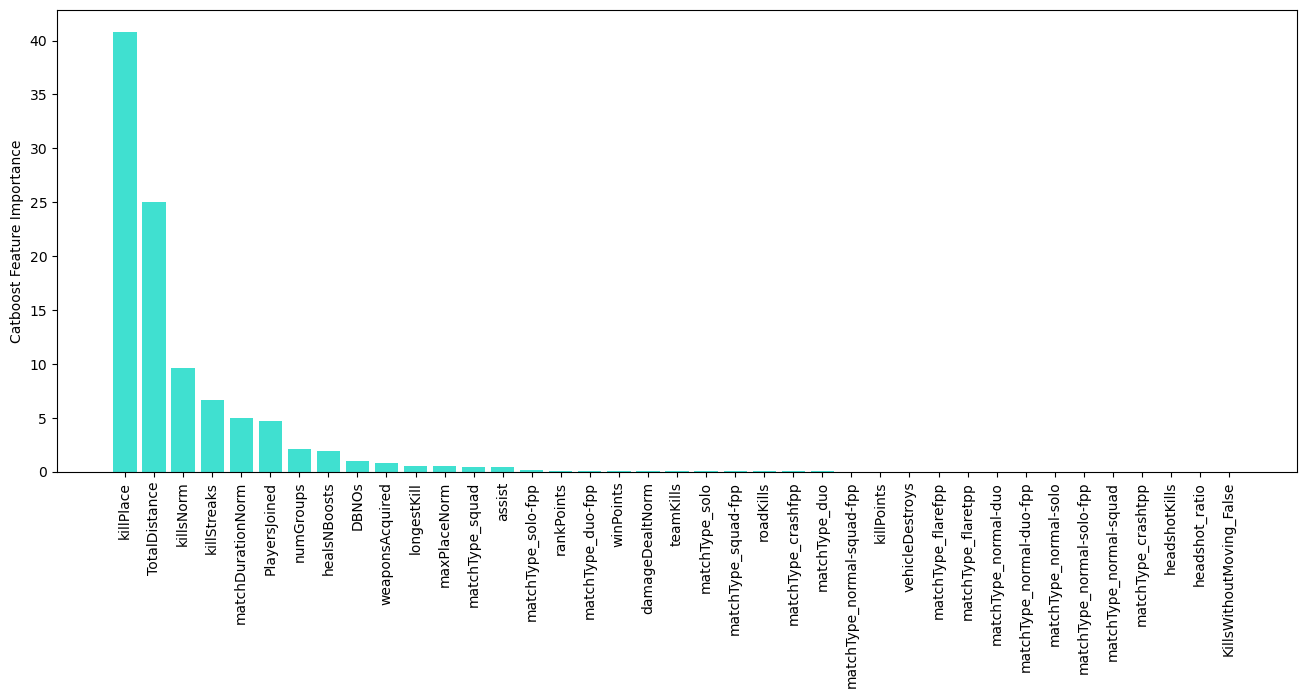

In [115]:
plt.bar(feature_importance_df.features, feature_importance_df.importance, color = 'turquoise')
plt.xticks(rotation = 90)
plt.ylabel('Catboost Feature Importance')
plt.show()

## Prediction

In [116]:
pred = model.predict(xtest)

In [117]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)

print("Testing Performance")

print(f"RMSE : {rmse}")
print(f"r2_score : {r2}")

Testing Performance
RMSE : 0.0822559777557603
r2_score : 0.9283643764979254


<center><img src = 'https://media0.giphy.com/media/Oaxj3RMJWuPutE8p8S/giphy.webp?cid=790b7611jjzasyff1f45yz6gwkc3wrcj10n4y3c1d8ejlrgw&ep=v1_gifs_search&rid=giphy.webp&ct=g'/></center>